## Creating a random number generator based on data distribution

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm, expon, weibull_min, gamma, pareto, genpareto, t, beta, fisk
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the enhanced combined stock data
data = pd.read_csv('../data-output/enhanced_combined_stock_data.csv')

# Ensure that 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

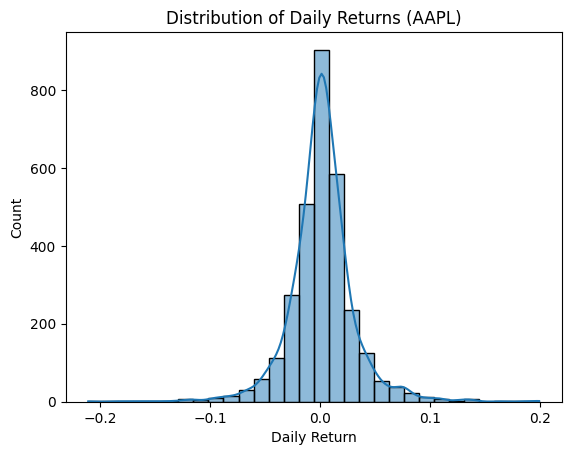

In [3]:
# Visualize the daily returns for a stock (e.g., AAPL)
sns.histplot(data['Daily Return'], kde=True, bins=30)
plt.title('Distribution of Daily Returns (AAPL)')

# save image
plt.savefig('../graphs/daily_returns_hist.png')

# Show the plot
plt.show()

In [4]:
# Import necessary libraries
# from scipy.stats import norm, lognorm, expon, weibull_min, gamma, pareto, genpareto, t, fisk, beta

# Fit a normal distribution
mu, std = norm.fit(data['Daily Return'].dropna())

# Fit a log-normal distribution
shape, loc, scale = lognorm.fit(data['Daily Return'].dropna())

# Fit an exponential distribution
loc_exp, scale_exp = expon.fit(data['Daily Return'].dropna())

# Fit a Weibull distribution
c, loc_w, scale_w = weibull_min.fit(data['Daily Return'].dropna())

# Fit a Gamma distribution
a, loc_g, scale_g = gamma.fit(data['Daily Return'].dropna())

# Fit a Pareto distribution
b, loc_p, scale_p = pareto.fit(data['Daily Return'].dropna())

# Fit a Generalized Pareto distribution
c_gp, loc_gp, scale_gp = genpareto.fit(data['Daily Return'].dropna())

# Fit a t-Distribution
df, loc_t, scale_t = t.fit(data['Daily Return'].dropna())

# Fit a Log-logistic distribution (using fisk instead of loglogistic)
c_ll, loc_ll, scale_ll = fisk.fit(data['Daily Return'].dropna())

# Fit a Beta distribution
a_b, b_b, loc_b, scale_b = beta.fit(data['Daily Return'].dropna())


c:\Users\idamn\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\idamn\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [5]:
# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {
    "Normal": kstest(data['Daily Return'].dropna(), 'norm', args=(mu, std)),
    "Log-normal": kstest(data['Daily Return'].dropna(), 'lognorm', args=(shape, loc, scale)),
    "Exponential": kstest(data['Daily Return'].dropna(), 'expon', args=(loc_exp, scale_exp)),
    "Weibull": kstest(data['Daily Return'].dropna(), 'weibull_min', args=(c, loc_w, scale_w)),
    "Gamma": kstest(data['Daily Return'].dropna(), 'gamma', args=(a, loc_g, scale_g)),
    "Pareto": kstest(data['Daily Return'].dropna(), 'pareto', args=(b, loc_p, scale_p)),
    "Gen Pareto": kstest(data['Daily Return'].dropna(), 'genpareto', args=(c_gp, loc_gp, scale_gp)),
    "t-distribution": kstest(data['Daily Return'].dropna(), 't', args=(df, loc_t, scale_t)),
    "Log-logistic (fisk)": kstest(data['Daily Return'].dropna(), 'fisk', args=(c_ll, loc_ll, scale_ll)),
    "Beta": kstest(data['Daily Return'].dropna(), 'beta', args=(a_b, b_b, loc_b, scale_b))
}

# Print KS test results for all distributions
for dist, result in ks_results.items():
    print(f"KS Test for {dist}: Statistic = {result[0]}, p-value = {result[1]}")


KS Test for Normal: Statistic = 0.08976339720378002, p-value = 1.3731901986056517e-21
KS Test for Log-normal: Statistic = 0.08872372167177833, p-value = 4.223724932879626e-21
KS Test for Exponential: Statistic = 0.49711861749931047, p-value = 0.0
KS Test for Weibull: Statistic = 0.12545480099817197, p-value = 8.03949049574803e-42
KS Test for Gamma: Statistic = 0.08657500368969706, p-value = 4.130984987421612e-20
KS Test for Pareto: Statistic = 0.4971186282326902, p-value = 0.0
KS Test for Gen Pareto: Statistic = 0.46608286363285184, p-value = 0.0
KS Test for t-distribution: Statistic = 0.016045456327223817, p-value = 0.4151104172086181
KS Test for Log-logistic (fisk): Statistic = 0.14895633229944438, p-value = 7.34825921207392e-59
KS Test for Beta: Statistic = 0.08910354258248221, p-value = 2.8060311812156315e-21


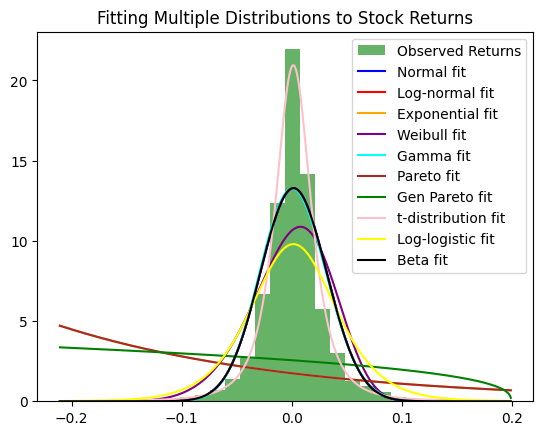

In [6]:
# Create an array of values for plotting
x = np.linspace(data['Daily Return'].min(), data['Daily Return'].max(), 1000)

# Plot the histogram of the observed daily returns
plt.hist(data['Daily Return'].dropna(), bins=30, density=True, alpha=0.6, color='g', label='Observed Returns')

# Plot the PDFs of each fitted distribution
plt.plot(x, norm.pdf(x, mu, std), label="Normal fit", color='blue')
plt.plot(x, lognorm.pdf(x, shape, loc, scale), label="Log-normal fit", color='red')
plt.plot(x, expon.pdf(x, loc_exp, scale_exp), label="Exponential fit", color='orange')
plt.plot(x, weibull_min.pdf(x, c, loc_w, scale_w), label="Weibull fit", color='purple')
plt.plot(x, gamma.pdf(x, a, loc_g, scale_g), label="Gamma fit", color='cyan')
plt.plot(x, pareto.pdf(x, b, loc_p, scale_p), label="Pareto fit", color='brown')
plt.plot(x, genpareto.pdf(x, c_gp, loc_gp, scale_gp), label="Gen Pareto fit", color='green')
plt.plot(x, t.pdf(x, df, loc_t, scale_t), label="t-distribution fit", color='pink')
plt.plot(x, fisk.pdf(x, c_ll, loc_ll, scale_ll), label="Log-logistic fit", color='yellow')  # Using fisk
plt.plot(x, beta.pdf(x, a_b, b_b, loc_b, scale_b), label="Beta fit", color='black')

# Add a legend
plt.legend()

# Add a title and display the plot
plt.title('Fitting Multiple Distributions to Stock Returns')

# save image
plt.savefig('../graphs/multiple_distributions.png')

# Show the plot
plt.show()


Implement Generator (using t-distribution based on best fit using KS test and visually inspecting)

In [7]:
# Generating Synthetic Data:

# Generate synthetic daily returns based on the t-distribution
synthetic_returns_t = t.rvs(df, loc_t, scale_t, size=len(data['Daily Return']))

# Adjust the initial price to match the actual stock price at the start
initial_price = data['Close'].iloc[0]  # Use the first value of the actual stock price

# Convert synthetic returns back to synthetic prices (assuming the adjusted initial price)
synthetic_prices_t = initial_price * np.exp(np.cumsum(synthetic_returns_t))  # Cumulative sum for price


Test generator (visually)

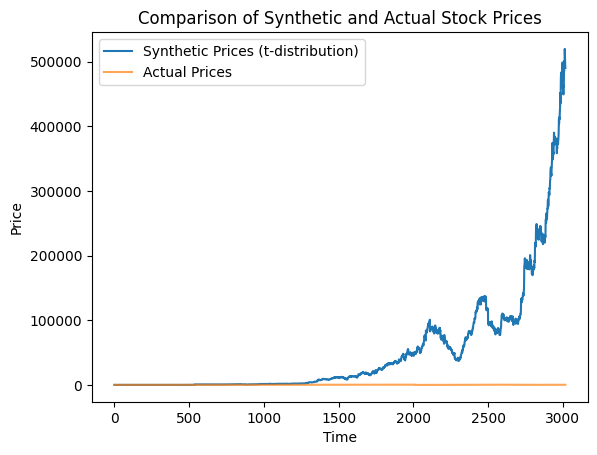

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the synthetic stock prices vs. actual stock prices
plt.plot(synthetic_prices_t, label='Synthetic Prices (t-distribution)')
plt.plot(data['Close'], label='Actual Prices', alpha=0.7)
plt.title("Comparison of Synthetic and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices.png')

# Show the plot
plt.show()